Part 2 – Data Exploration & Insights

according to teh decisions and assumptions made in part 1 i'm exploring about the followings: 
1. Deal quality 
2. sales executions(reps, follow ups , delays)
3. regional differencs

the below eda part we explore these by figuring the win rate breakdown , sales cycle adn follow up behaviour , deal stage drop off , regional and segment performance

In [1]:
import pandas as pd
df= pd.read_csv("skygeni_sales_data.csv")

In [2]:
print(df.head())
print(df.info())

  deal_id created_date closed_date sales_rep_id    industry         region  \
0  D00001   2023-11-24  2023-12-15       rep_22        SaaS  North America   
1  D00002   2023-01-17  2023-01-27        rep_7        SaaS          India   
2  D00003   2023-10-29  2023-12-10        rep_5  HealthTech           APAC   
3  D00004   2023-07-14  2023-08-02       rep_18     FinTech          India   
4  D00005   2024-02-29  2024-05-26        rep_2  HealthTech           APAC   

  product_type lead_source   deal_stage  deal_amount  sales_cycle_days outcome  
0   Enterprise    Referral    Qualified         4253                21     Won  
1         Core    Referral       Closed         3905                10     Won  
2         Core     Inbound     Proposal        10615                42    Lost  
3         Core     Partner  Negotiation         4817                19     Won  
4         Core    Outbound    Qualified        45203                87    Lost  
<class 'pandas.core.frame.DataFrame'>
RangeIn

Column undersanding :

deal id : unique id for every deal .
created date : the date when the deal was first entered the sales pipeline
close date : the date when the deal was closed 
sales rep id : sales person handled the deal
industry : customer's industry ( fintech , Saas , healthtech.. )
region : region / location of the customer
product ytpe : whcih type of prodcut the customer was buying
lead source : where the lead came from ( referrral , inbound , partner , outbound ..)
deal stage : stage of the deal ( qualified , closed , proposal negotiation ..)
deal amoutn : contract value
sales cycle day : diiference between created date and closing date of the deal
outcome : result of the deal (win or lost)


In [3]:
df.isnull().sum()

deal_id             0
created_date        0
closed_date         0
sales_rep_id        0
industry            0
region              0
product_type        0
lead_source         0
deal_stage          0
deal_amount         0
sales_cycle_days    0
outcome             0
dtype: int64

In [4]:
df['deal_id'].value_counts().sum()

np.int64(5000)

In [5]:
import matplotlib.pyplot as plt
win_lose = df['outcome'].value_counts()
print(win_lose)

outcome
Lost    2737
Won     2263
Name: count, dtype: int64


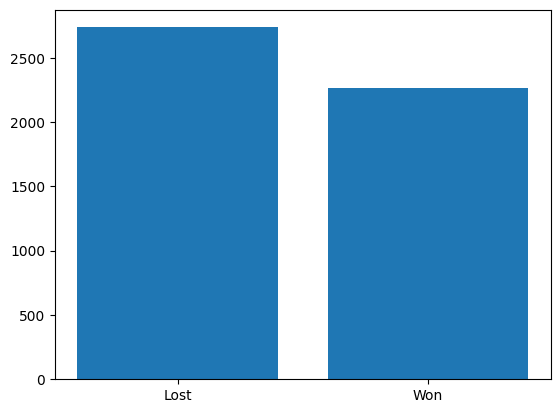

In [6]:
plt.bar(win_lose.index, win_lose.values)
plt.show()

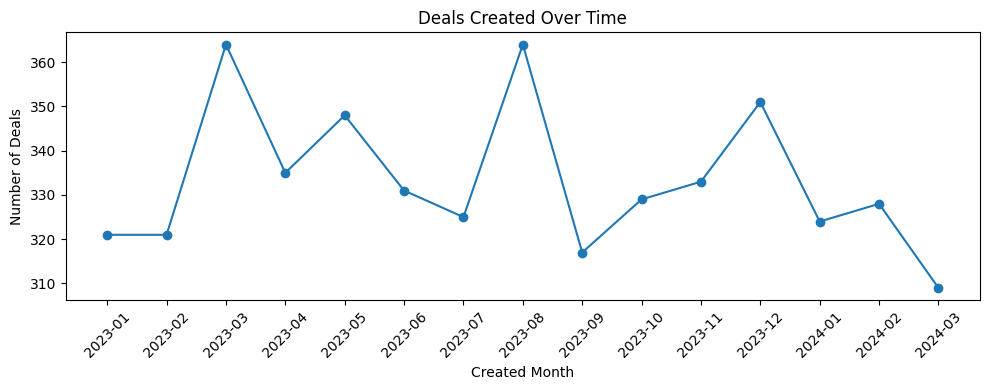

In [7]:
df['created_date'] = pd.to_datetime(df['created_date'])
df['created_month'] = df['created_date'].dt.to_period('M')
plt.figure(figsize=(10,4))
created_counts = df.groupby('created_month').size().sort_index()
plt.plot(created_counts.index.astype(str), created_counts.values, marker='o')
plt.xlabel('Created Month')
plt.ylabel('Number of Deals')
plt.title('Deals Created Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

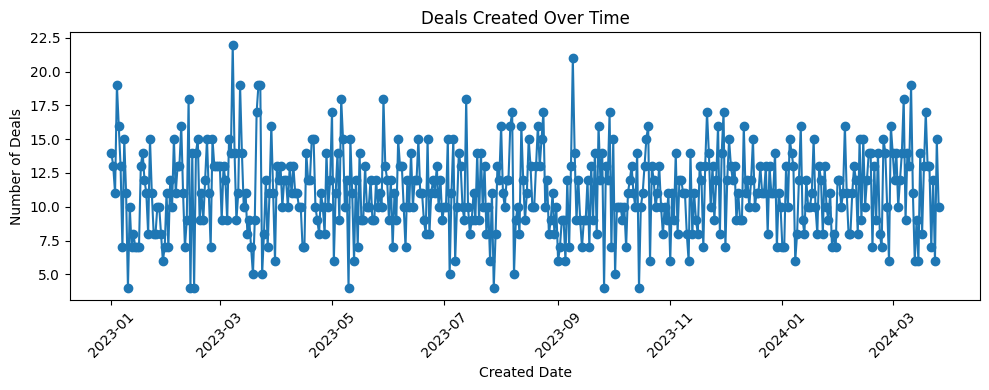

In [8]:
df['created_date'] = pd.to_datetime(df['created_date']).dt.date
created_counts = df.groupby('created_date').size().sort_index()
plt.figure(figsize=(10,4))
plt.plot(created_counts.index, created_counts.values, marker='o')
plt.xlabel('Created Date')
plt.ylabel('Number of Deals')
plt.title('Deals Created Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

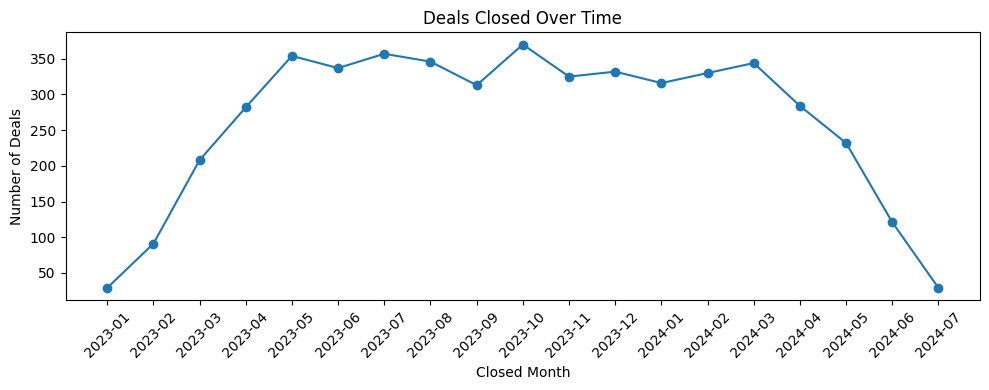

In [9]:
df['closed_date'] = pd.to_datetime(df['closed_date'])
df['closed_month'] = df['closed_date'].dt.to_period('M')
plt.figure(figsize=(10,4))
closed_counts = df.groupby('closed_month').size().sort_index()
plt.plot(closed_counts.index.astype(str), closed_counts.values, marker='o')
plt.xlabel('Closed Month')
plt.ylabel('Number of Deals')
plt.title('Deals Closed Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

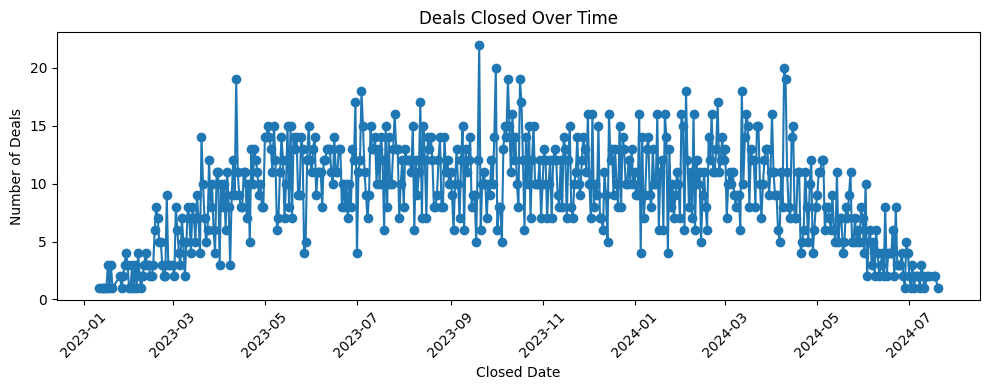

In [10]:
df['closed_date'] = pd.to_datetime(df['closed_date']).dt.date
closed_counts = df.groupby('closed_date').size().sort_index()
plt.figure(figsize=(10,4))
plt.plot(closed_counts.index, closed_counts.values, marker='o')
plt.xlabel('Closed Date')
plt.ylabel('Number of Deals')
plt.title('Deals Closed Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight 1**: from the above we have 5000 deal data 

Lost    2737
Won     2263 

from the vlaue counts we can find that the lost ratio is higher than win 

through analysing the deals by date and month  , deal creation remains stable overtime , with noticable seasonal spikes around march and mid year .

Deal closures peak in late 2023 but decline significantly in 2024.

The growing gap between created and closed deals indicates that pipeline volume is not the issue; deal conversion is.

Recent months show a widening gap between deals created and deals closed, suggesting increased deal stagnation and execution challenges.

Seasonal increases in deal creation do not always result in higher closures, pointing to weaknesses in later sales stages.

**Win rate breakdown**

In [11]:
df['sales_rep_id']

0       rep_22
1        rep_7
2        rep_5
3       rep_18
4        rep_2
         ...  
4995    rep_13
4996    rep_20
4997    rep_24
4998    rep_21
4999     rep_5
Name: sales_rep_id, Length: 5000, dtype: object

In [12]:
df['sales_rep_id'].value_counts()

sales_rep_id
rep_20    230
rep_16    223
rep_2     221
rep_3     216
rep_22    212
rep_1     211
rep_21    208
rep_14    207
rep_25    205
rep_7     204
rep_24    203
rep_4     203
rep_5     201
rep_6     201
rep_11    200
rep_19    196
rep_13    195
rep_10    191
rep_8     187
rep_18    186
rep_9     186
rep_23    184
rep_12    180
rep_17    175
rep_15    175
Name: count, dtype: int64

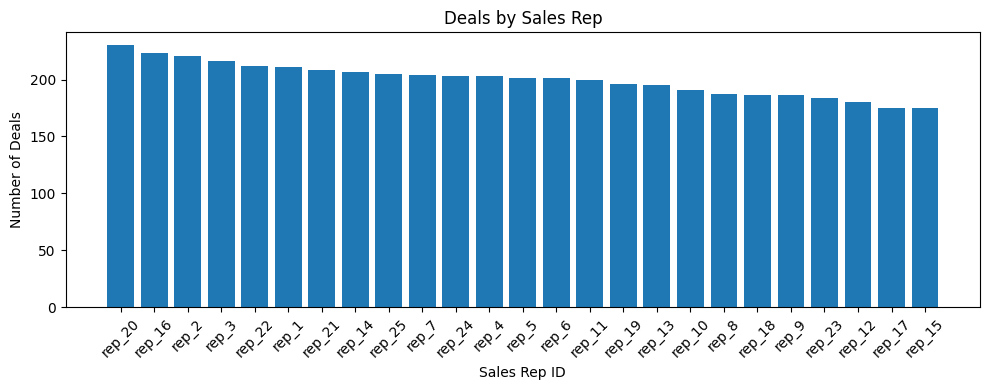

In [13]:
plt.figure(figsize=(10,4))
sales_rep_counts = df['sales_rep_id'].value_counts()
plt.bar(sales_rep_counts.index.astype(str), sales_rep_counts.values)
plt.xlabel('Sales Rep ID')
plt.ylabel('Number of Deals')
plt.title('Deals by Sales Rep')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
rep_outcome = df.groupby(['sales_rep_id', 'outcome']).size().unstack(fill_value=0)
print(rep_outcome)

outcome       Lost  Won
sales_rep_id           
rep_1          115   96
rep_10         110   81
rep_11         107   93
rep_12          93   87
rep_13         109   86
rep_14         116   91
rep_15          97   78
rep_16         118  105
rep_17          97   78
rep_18         110   76
rep_19         102   94
rep_2          119  102
rep_20         122  108
rep_21         102  106
rep_22         127   85
rep_23         102   82
rep_24         112   91
rep_25         112   93
rep_3          114  102
rep_4          110   93
rep_5          109   92
rep_6          115   86
rep_7          119   85
rep_8           97   90
rep_9          103   83


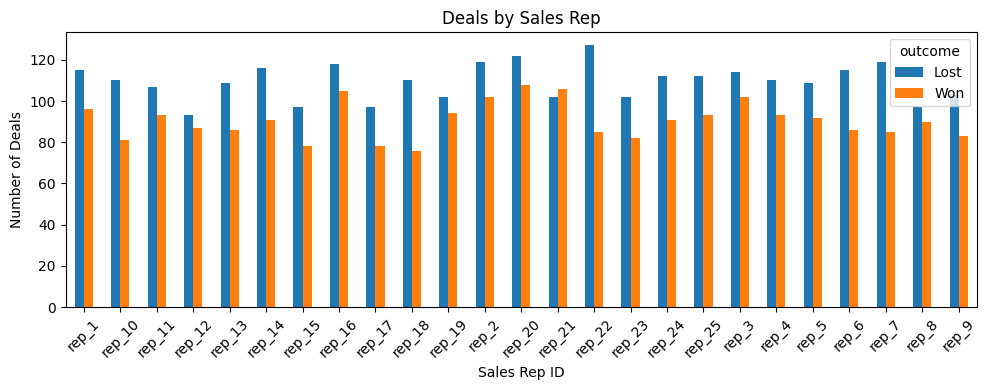

In [15]:
rep_outcome.plot(kind='bar',  figsize=(10,4))
plt.xlabel('Sales Rep ID')
plt.ylabel('Number of Deals')
plt.title('Deals by Sales Rep')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight 2** :

For almost every sales rep, the number of lost deals is higher than won deals.

Most sales reps show a higher number of lost deals than won deals, indicating a general decline in conversion rather than an isolated performance issue.

The drop in win rate appears to be driven by consistent losses across most sales reps rather than failure by a small subset of the team.

**Group deals by industry and calculate win rate**

In [16]:
ind_outcome = df.groupby(['industry', 'outcome']).size().unstack(fill_value=0)
print(ind_outcome)

outcome     Lost  Won
industry             
Ecommerce    584  476
EdTech       554  438
FinTech      490  447
HealthTech   560  450
SaaS         549  452


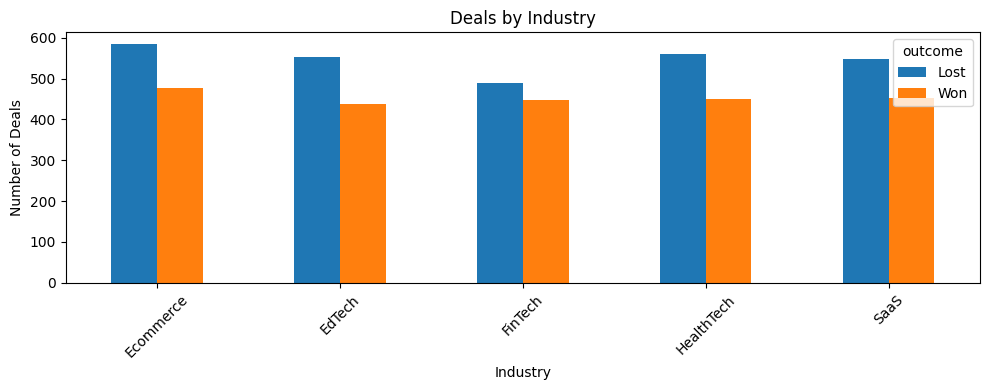

In [17]:
ind_outcome.plot(kind='bar',  figsize=(10,4))
plt.xlabel('Industry')
plt.ylabel('Number of Deals')
plt.title('Deals by Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight 3** :

For almost every industry, the number of lost deals is higher than won deals.

industries like Ecommerce and HealthTech show a noticeably larger gap between wins and losses, suggesting that these segments may be contributing more to the overall win rate drop.

If the issue was only in one industry, the fix would be simple. Since losses appear across all industries, the problem likely lies in broader sales execution or process issues, with certain industries requiring extra attention.

**Group deals by region and calculate win rate**

In [18]:
reg_outcome = df.groupby(['region', 'outcome']).size().unstack(fill_value=0)
print(reg_outcome)

outcome        Lost  Won
region                  
APAC            684  558
Europe          671  562
India           698  588
North America   684  555


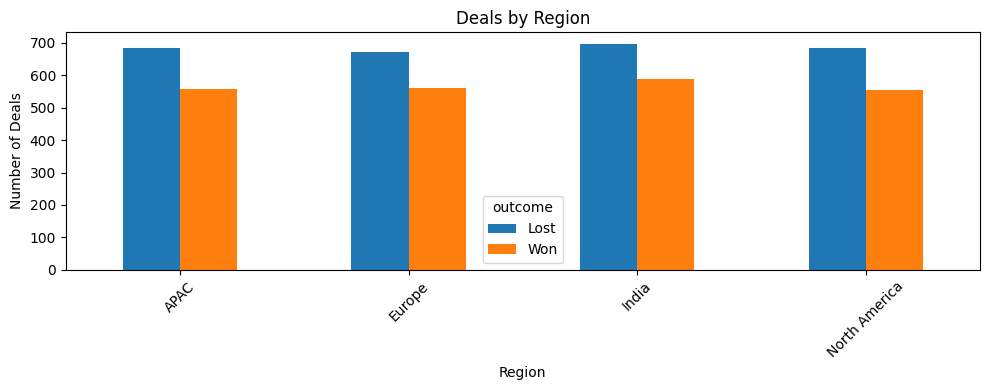

In [19]:
reg_outcome.plot(kind='bar',  figsize=(10,4))
plt.xlabel('Region')
plt.ylabel('Number of Deals')
plt.title('Deals by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight 4** :

Across all regions, the number of lost deals is consistently higher than the number of won deals, indicating that the decline in win rate is a global issue rather than being driven by a single region. 

While regions like India and APAC show slightly higher deal volume, the win–loss gap remains similar across regions, suggesting that the problem lies more in sales execution and deal conversion than in regional demand.

**Group deals by lead_source and calculate win rate**

In [21]:
lead_outcome=df.groupby(['lead_source', 'outcome']).size().unstack(fill_value=0)
print(lead_outcome)

outcome      Lost  Won
lead_source           
Inbound       681  581
Outbound      679  567
Partner       695  545
Referral      682  570


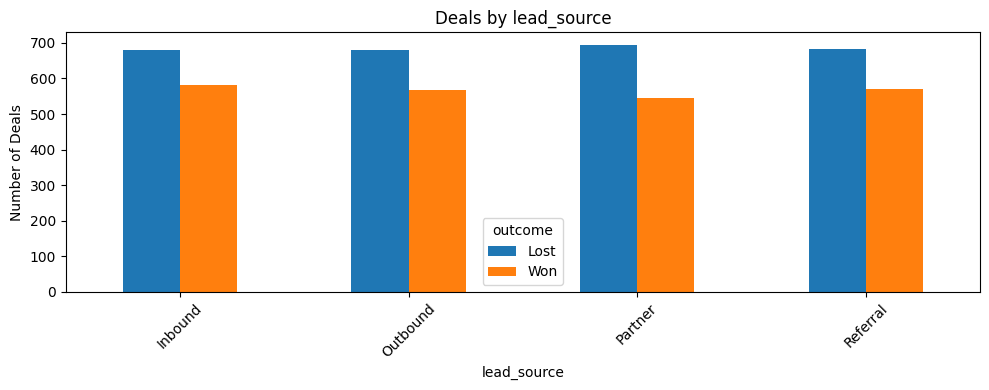

In [22]:
lead_outcome.plot(kind='bar',  figsize=(10,4))
plt.xlabel('lead_source')
plt.ylabel('Number of Deals')
plt.title('Deals by lead_source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight 5**: 

Across all lead sources, lost deals outnumber won deals, indicating that lead volume alone is not driving success. 

Referral and Inbound leads show relatively better win outcomes compared to Outbound and Partner leads, suggesting that lead quality and intent play a major role in deal conversion.

The win rate decline is influenced by lead source quality, with Outbound and Partner leads contributing disproportionately to losses.
    

**Group deals by product_type and calculate win rate**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   deal_id           5000 non-null   object   
 1   created_date      5000 non-null   object   
 2   closed_date       5000 non-null   object   
 3   sales_rep_id      5000 non-null   object   
 4   industry          5000 non-null   object   
 5   region            5000 non-null   object   
 6   product_type      5000 non-null   object   
 7   lead_source       5000 non-null   object   
 8   deal_stage        5000 non-null   object   
 9   deal_amount       5000 non-null   int64    
 10  sales_cycle_days  5000 non-null   int64    
 11  outcome           5000 non-null   object   
 12  created_month     5000 non-null   period[M]
 13  closed_month      5000 non-null   period[M]
dtypes: int64(2), object(10), period[M](2)
memory usage: 547.0+ KB


In [25]:
product_outcome = df.groupby(['product_type', 'outcome']).size().unstack(fill_value=0)
print(product_outcome)

outcome       Lost  Won
product_type           
Core           923  771
Enterprise     897  733
Pro            917  759


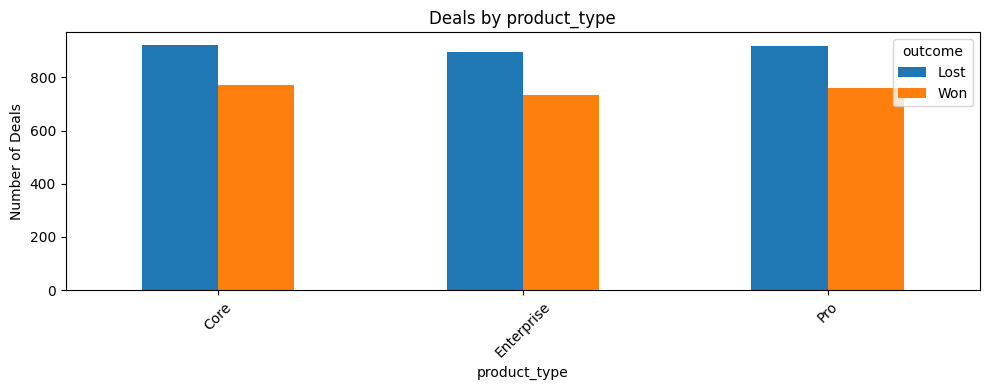

In [26]:
product_outcome.plot(kind='bar',  figsize=(10,4))
plt.xlabel('product_type')
plt.ylabel('Number of Deals')
plt.title('Deals by product_type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight 6**:

Across all product types, the number of lost deals is consistently higher than the number of won deals, indicating that the win rate issue is not limited to a specific product.
 
Core, Enterprise, and Pro products all show similar win–loss patterns, suggesting that the decline in win rate is driven more by sales execution or process issues than by the product offering itself.

**Group deals by deal_type and calculate win rate**

In [27]:
deal_stage_outcome = df.groupby(['deal_stage', 'outcome']).size().unstack(fill_value=0)
print(deal_stage_outcome)

outcome      Lost  Won
deal_stage            
Closed        531  466
Demo          565  478
Negotiation   531  464
Proposal      558  451
Qualified     552  404


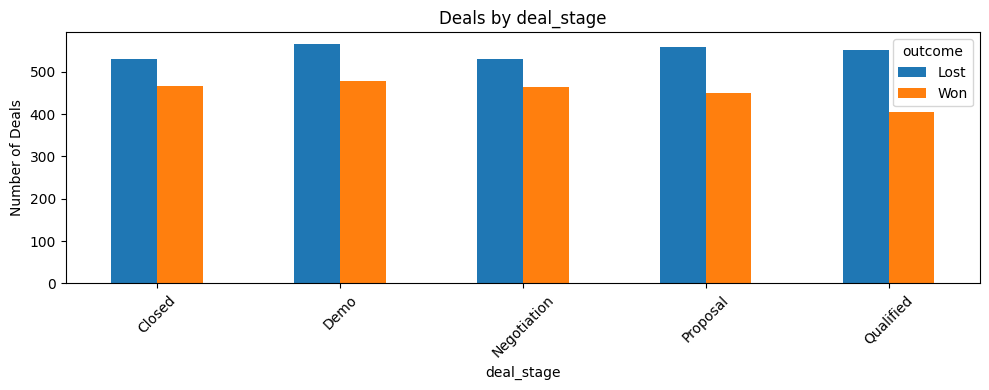

In [28]:
deal_stage_outcome.plot(kind='bar',  figsize=(10,4))
plt.xlabel('deal_stage')
plt.ylabel('Number of Deals')
plt.title('Deals by deal_stage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
stage_total = df.groupby('deal_stage').size().reset_index(name='total_deals')
stage_outcome = (df.groupby(['deal_stage', 'outcome']).size().unstack(fill_value=0).reset_index()
)
stage_summary = stage_outcome.merge(stage_total, on='deal_stage')
stage_summary['loss_percentage'] = (
    stage_summary['Lost'] / stage_summary['total_deals']) * 100
stage_summary = stage_summary.sort_values(by='loss_percentage', ascending=False)
stage_summary



,deal_stage,Lost,Won,total_deals,loss_percentage
4,Qualified,552,404,956,57.740586
3,Proposal,558,451,1009,55.302279
1,Demo,565,478,1043,54.170662
2,Negotiation,531,464,995,53.366834
0,Closed,531,466,997,53.259779


**Insight 7**:

Deals are being lost at every stage of the sales funnel, but the highest imbalance between won and lost deals appears at the Qualified and Proposal stages. 
This suggests that while leads are entering the pipeline successfully, many deals fail to progress further due to issues such as poor qualification, weak value communication, or early-stage disengagement.

**outcome based on Amount**

C:\Users\anjan\AppData\Local\Temp\ipykernel_17772\4099418000.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([won_amounts, lost_amounts], labels=['Won', 'Lost'])


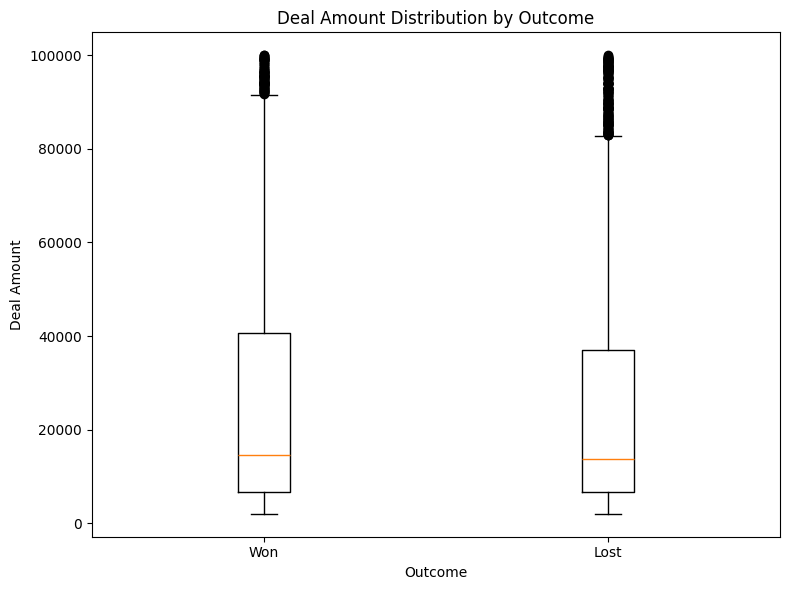

In [30]:
won_amounts = df[df['outcome'] == 'Won']['deal_amount']
lost_amounts = df[df['outcome'] == 'Lost']['deal_amount']
plt.figure(figsize=(8, 6))
plt.boxplot([won_amounts, lost_amounts], labels=['Won', 'Lost'])

plt.title('Deal Amount Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Deal Amount')
plt.tight_layout()
plt.show()

**Insight 8**:

The median deal amount for Won and Lost deals is very similar,So deal size alone is not the main reason deals are being lost.

Lost deals have a slightly wider spread, especially on the higher end,Bigger deals are more risky and don’t consistently convert.

Both outcomes have lots of high-value outliers (very large deals),Even expensive deals can be won, but they’re unpredictable.

The middle 50% of deals (the box) overlaps a lot for Won and Lost ,execution factors (follow-ups, reps, timing) probably matter more than price.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   deal_id           5000 non-null   object   
 1   created_date      5000 non-null   object   
 2   closed_date       5000 non-null   object   
 3   sales_rep_id      5000 non-null   object   
 4   industry          5000 non-null   object   
 5   region            5000 non-null   object   
 6   product_type      5000 non-null   object   
 7   lead_source       5000 non-null   object   
 8   deal_stage        5000 non-null   object   
 9   deal_amount       5000 non-null   int64    
 10  sales_cycle_days  5000 non-null   int64    
 11  outcome           5000 non-null   object   
 12  created_month     5000 non-null   period[M]
 13  closed_month      5000 non-null   period[M]
dtypes: int64(2), object(10), period[M](2)
memory usage: 547.0+ KB


**outcome based on Sales cycle days**

C:\Users\anjan\AppData\Local\Temp\ipykernel_17772\2016688840.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([won_amounts, lost_amounts], labels=['Won', 'Lost'])


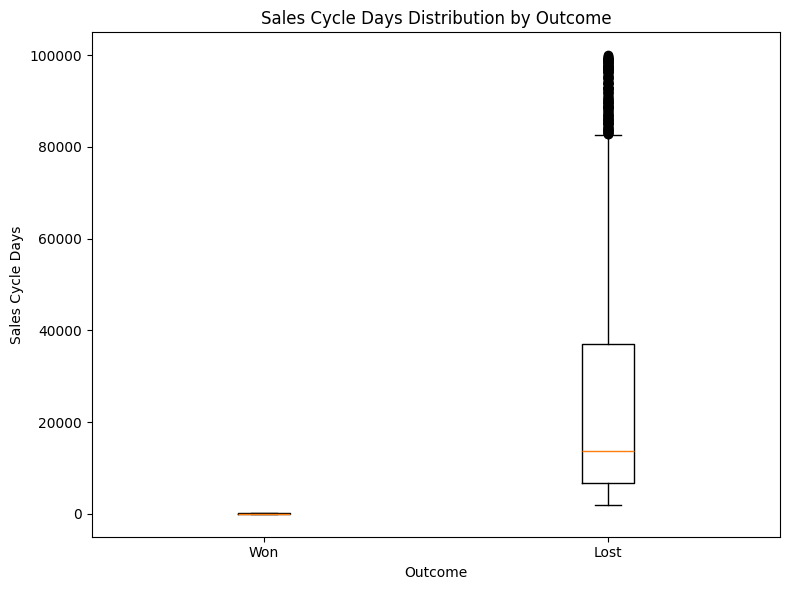

In [32]:
won_amounts = df[df['outcome'] == 'Won']['sales_cycle_days']
lost_amounts = df[df['outcome'] == 'Lost']['deal_amount']
plt.figure(figsize=(8, 6))
plt.boxplot([won_amounts, lost_amounts], labels=['Won', 'Lost'])

plt.title('Sales Cycle Days Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Sales Cycle Days')
plt.tight_layout()
plt.show()

**Insight 9**:

Deals that are won tend to close quickly and don’t drag on.
The longer a deal stays in the pipeline, the higher the probability of loss.
Sales cycle length is far more important than price in determining outcome.


**EDA conclusion** :

After exploring the data, one pattern stands out very clearly. 
Deals that stay open for a long time are much more likely to be lost. 
When the sales cycle stretches beyond the usual duration, the chances of closing the deal drop sharply. 
This suggests that delays, weak follow-ups, or stalled conversations slowly make the deal go cold, and customers lose interest over time.

In contrast, deals that close faster are more likely to be won, even when the deal amount is similar. 
So the issue is not just what we sell or to whom, but how long we take to move the deal forward. 
Overall, the EDA shows that sales cycle days is a key driver behind deal failure, and reducing delays can directly improve win rates.